In [20]:
import os
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm

from src.deep.ml_ops import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# load trainer from file
trainer = Trainer.load_trainer_from_file('../../data/saved_models/model_SingleMuModel3Layers_50_epochs')

In [22]:
# TODO: create function Trainer.fix_datasets_paths(dataset_path)
dataset_path = '../../data/datasets'
for ds in [trainer.train_dataset, trainer.val_dataset]:
    extension = ds.data_dir_path.split('/data/datasets')[1]
    ds.data_dir_path = os.path.abspath(f'{dataset_path}{extension}')
    print(f'updating path to:\n\t{ds.data_dir_path}')

updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_150x5/150_samples_mu=0.001
updating path to:
	/Users/yarden/Desktop/projects/thesis_stuff/Thesis-code/data/datasets/qam1024_150x5/150_samples_mu=0.001


x.shape=torch.Size([8192, 2]), y.shape=torch.Size([8192, 2])
x_np.shape=(8192, 2),y_np.shape=(8192, 2),pred_np.shape=(8192, 2)


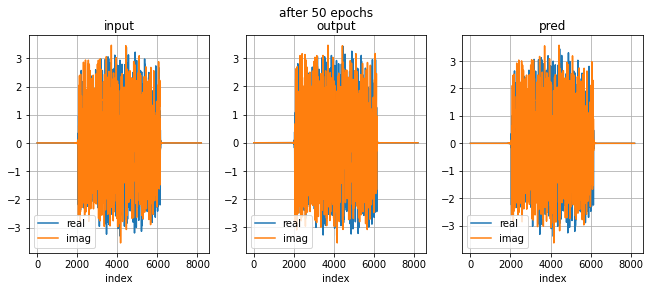

x power=1.0492568016052246
y power=1.119580626487732
pred power=1.10


In [23]:
trainer.test_single_item(0, verbose=True)

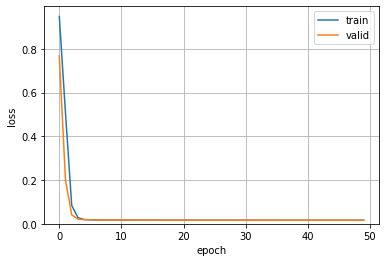

In [24]:
trainer.plot_loss_vec()

In [25]:
# TODO: test ber after training

# calc original ber
trainer.compare_ber(tqdm=tqdm)

  0%|          | 0/30 [00:00<?, ?it/s]

the original avg ber is 0.006380208333333332


  0%|          | 0/30 [00:00<?, ?it/s]

the trained avg ber is 0.006510416666666665
